# Trabajo Integrador - Python para Analisis de Datos

# Delitos en la Ciudad de Buenos Aires

Este proyecto tiene como objetivo analizar datos de delitos ocurridos en la Ciudad de Buenos Aires para identificar patrones y tendencias que permitan comprender mejor la distribución y frecuencia de los distintos tipos de crímenes. A través del uso de Python y herramientas de análisis de datos, se explorarán y visualizarán variables como la ubicación geográfica, el tipo de delito, y la evolución temporal de los mismos. El análisis busca ofrecer información relevante que pueda contribuir a mejorar la seguridad pública y facilitar la toma de decisiones en materia de prevención y políticas de seguridad.

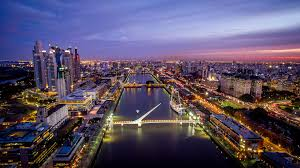


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Delitos = pd.read_csv("delitos2019.csv")

In [3]:
Delitos.head()

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
0,374556,2019-01-01,12,Lesiones,Siniestro Vial,1.0,4.0,Nueva Pompeya,-34.648387,-58.404748
1,426152,2019-01-01,6,Robo (con violencia),NaN,1.0,9.0,Liniers,-34.649827,-58.513859
2,371604,2019-01-01,8,Lesiones,Siniestro Vial,1.0,15.0,Chacarita,-34.588108,-58.439392
3,425359,2019-01-01,16,Hurto (sin violencia),Hurto Automotor,1.0,10.0,Floresta,-34.631877,-58.483975
4,437571,2019-01-01,2,Robo (con violencia),Robo Automotor,1.0,4.0,Parque Patricios,-34.633161,-58.397123


# Análisis de la Cantidad de Delitos Totales en 2019

In [4]:
TotalDelitos = Delitos["cantidad_registrada"].sum()

print(f"Total de delitos denunciados en 2019: {TotalDelitos}")

Total de delitos denunciados en 2019: 117668.0


El análisis inicia con un cálculo del total de delitos denunciados durante el año 2019. Este número es fundamental para dimensionar la magnitud de los incidentes reportados y sirve como punto de partida para futuros análisis.

# Top 5 de Barrios con Más Delitos en 2019

In [5]:
DelitosBarrio = Delitos.groupby("barrio")["cantidad_registrada"].sum()

# Ordeno los barrios por la cantidad de delitos en orden descendente

Top5Barrios = DelitosBarrio.sort_values(ascending=False).head(5)

print("Top 5 barrios con más delitos:")
print(Top5Barrios)

Top 5 barrios con más delitos:
barrio
Palermo        9560.0
Balvanera      9239.0
San Nicolás    6246.0
Recoleta       5589.0
Flores         5518.0
Name: cantidad_registrada, dtype: float64


Una manera efectiva de analizar los datos de seguridad es identificar las áreas geográficas con mayores índices de delitos. Este análisis se centró en encontrar los 5 barrios con más delitos registrados durante el año 2019.

# Top 5 de Barrios con Menos Delitos en 2019

In [6]:
# Agrupo los datos por barrio y sumo la cantidad de delitos

DelitosBarrio = Delitos.groupby("barrio")["cantidad_registrada"].sum()

# Ordeno los barrios por la cantidad de delitos en orden ascendente

Top5MenosDelitos = DelitosBarrio.sort_values(ascending=True).head(5)

print("Top 5 barrios con menos delitos:")
print(Top5MenosDelitos)

Top 5 barrios con menos delitos:
barrio
Puerto Madero    283.0
Villa Real       343.0
Versalles        392.0
Agronomía        454.0
Coghlan          476.0
Name: cantidad_registrada, dtype: float64


Así como es importante identificar los barrios con mayores índices delictivos, resulta útil observar aquellos que presentan los niveles más bajos de delitos. Este análisis se centró en encontrar los 5 barrios con menos delitos registrados durante el año 2019.

# Análisis de las Franjas Horarias con Más Delitos en 2019

In [7]:
# Agrupo los datos por franja horaria y sumo la cantidad de delitos

DelitosHorario = Delitos.groupby("franja_horaria")["cantidad_registrada"].sum()

# Ordeno las franjas horarias en orden descendente según la cantidad de delitos

HorariosOrdenados = DelitosHorario.sort_values(ascending=False)

print("Franja horaria ordenada de forma descendente:")
print(HorariosOrdenados)

Franja horaria ordenada de forma descendente:
franja_horaria
18     7415.0
19     7224.0
20     6990.0
17     6612.0
16     6518.0
14     6458.0
12     6407.0
21     6337.0
15     6316.0
13     6044.0
10     5536.0
11     5527.0
22     5449.0
8      5122.0
9      4931.0
23     4501.0
7      3899.0
0      3075.0
6      2998.0
1      2445.0
5      2357.0
2      1965.0
4      1815.0
3      1719.0
S/D       8.0
Name: cantidad_registrada, dtype: float64


Un aspecto clave para entender los patrones delictivos es analizar los horarios en los que se concentran los incidentes. Este análisis identifica las franjas horarias más problemáticas durante el año 2019, ordenándolas de mayor a menor cantidad de delitos registrados.

Resultados:
La franja horaria más problemática, con mayor cantidad de delitos, se encuentra en el horario de las 18:00

# Día con Mayor Cantidad de Delitos en 2019

In [8]:
# Agrupo los datos por fecha y sumo la cantidad de delitos

DelitosxDia= Delitos.groupby("fecha")["cantidad_registrada"].sum()

# Identifico el día con mayor cantidad de delitos

DiaMaxDelitos = DelitosxDia.idxmax()
CantidadMaxDelitos = DelitosxDia.max()

print(f"El día con mayor cantidad de delitos es: {DiaMaxDelitos} con {CantidadMaxDelitos} delitos registrados.")

El día con mayor cantidad de delitos es: 2019-03-11 con 467.0 delitos registrados.


Para identificar los picos delictivos, se analizó cuál fue el día con mayor cantidad de delitos registrados durante el año 2019. Este análisis permite entender si existieron eventos específicos que incrementaron la cantidad de denuncias en un día particular.

# Visualización: Top 5 de Barrios Más Peligrosos en 2019

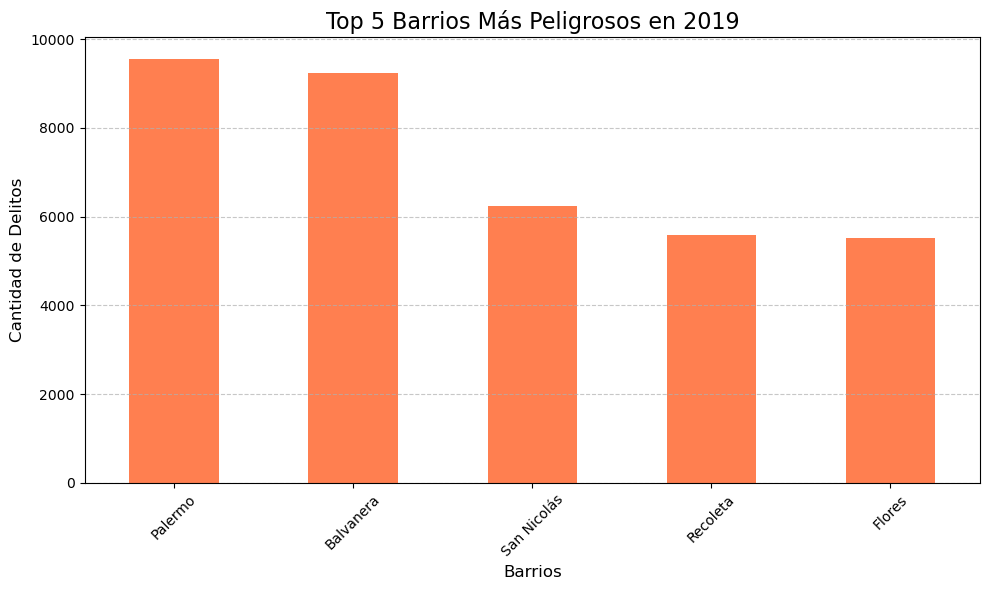

In [9]:
# Creo un gráfico de barras para el Top 5 de barrios con más delitos

Top5Barrios.plot(kind="bar", color="coral", figsize=(10, 6))

# Configuro el título y las etiquetas

plt.title("Top 5 Barrios Más Peligrosos en 2019", fontsize=16)
plt.xlabel("Barrios", fontsize=12)
plt.ylabel("Cantidad de Delitos", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

El gráfico permite observar fácilmente la distribución de los delitos en los barrios más afectados.

# Visualización: Top 5 de Barrios Más Seguros en 2019

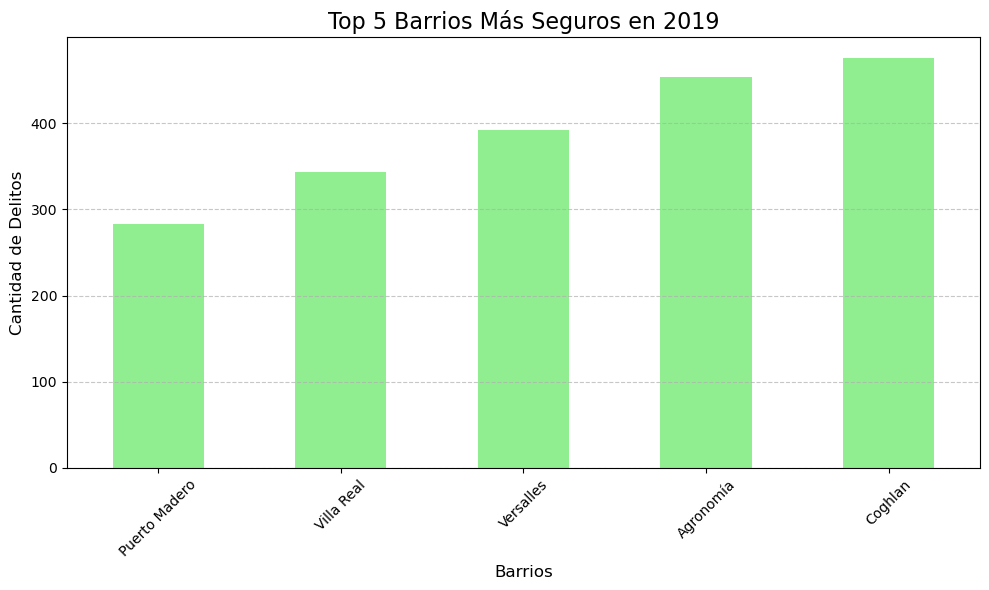

In [10]:
# Creo un gráfico de barras para el Top 5 de barrios con menos delitos

Top5MenosDelitos.plot(kind="bar", color="lightgreen", figsize=(10, 6))

# Configuro el título y las etiquetas

plt.title("Top 5 Barrios Más Seguros en 2019", fontsize=16)
plt.xlabel("Barrios", fontsize=12)
plt.ylabel("Cantidad de Delitos", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

El gráfico nos permite observar de forma rápida y clara cuáles son los barrios con menor incidencia delictiva. Esta información podría usarse para identificar posibles factores sociales, económicos o culturales que promuevan la seguridad en estas áreas.

# Análisis del Mes Más Inseguro en 2019

In [11]:
# Primero me aseguro de que la columna 'fecha' sea del tipo datetime

Delitos["fecha"] = pd.to_datetime(Delitos["fecha"], format="%Y-%m-%d")

# Ahora Creao la nueva columna 'mes' a partir de la columna 'fecha'

Delitos["mes"] = Delitos["fecha"].dt.month

# Agrupo los datos por mes y sumo la cantidad de delitos

DelitosxMes = Delitos.groupby("mes")["cantidad_registrada"].sum()

# Identifico el mes con mayor cantidad de delitos

MesMaxDelitos = DelitosxMes.idxmax()
CantidadMaxDelitosM = DelitosxMes.max()

print(f"El mes más inseguro es el número {MesMaxDelitos} con {CantidadMaxDelitosM} delitos registrados.")


El mes más inseguro es el número 3 con 11244.0 delitos registrados.


El análisis mensual de los delitos registrados es crucial para identificar tendencias estacionales o eventos recurrentes que puedan influir en la seguridad de la ciudad.

# Visualización: Distribución de Tipos de Delito en 2019

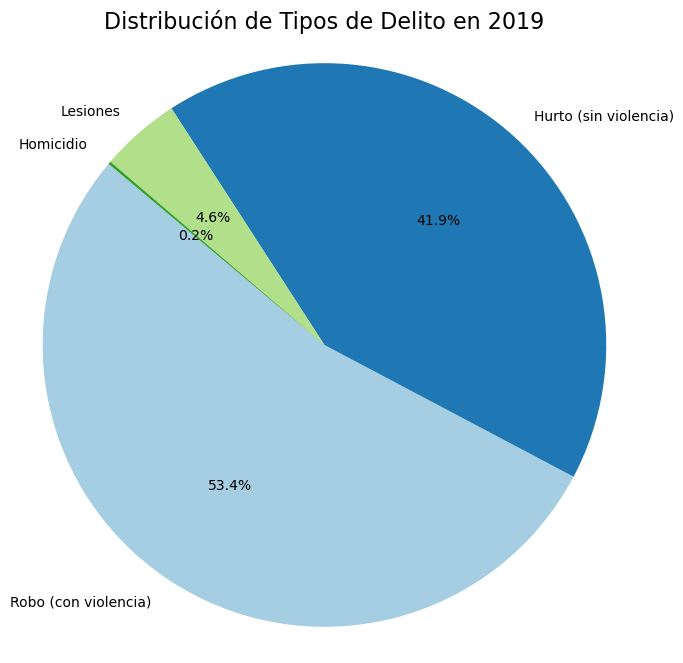

El tipo de delito más frecuente es: Robo (con violencia) con 62796 registros.


In [12]:
# Comienzo por contar las ocurrencias de cada tipo de delito

DelitosxTipo = Delitos["tipo_delito"].value_counts()

# Creo un gráfico de torta

plt.figure(figsize=(8, 8))
plt.pie(DelitosxTipo, labels=DelitosxTipo.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title("Distribución de Tipos de Delito en 2019", fontsize=16)

plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

# Muestro de manera complementaria el tipo de delito más frecuente

TipoMaxDelito = DelitosxTipo.idxmax()
CantidadMaxDelitoT = DelitosxTipo.max()
print(f"El tipo de delito más frecuente es: {TipoMaxDelito} con {CantidadMaxDelitoT} registros.")

El análisis de la distribución de los tipos de delito registrados es fundamental para entender qué actividades delictivas son las más prevalentes en el área de estudio.

# Conclusiones

## Identificación de zonas de alto riesgo:

A través del análisis de la cantidad de delitos por barrio, se identificaron los cinco barrios más peligrosos, lo que es clave para priorizar estrategias de seguridad en esas zonas. Además, los barrios con menor incidencia delictiva nos brindan ejemplos de áreas que podrían estar implementando medidas de seguridad efectivas.

## Tendencias mensuales:

Al analizar los datos por mes, se observó que hubo un mes específico con una cantidad significativamente mayor de delitos. Esta información puede ser útil para predecir períodos de mayor riesgo y reforzar las medidas preventivas durante esos meses. Es importante seguir monitoreando las tendencias mensuales para detectar patrones recurrentes.

## Tipos de delito más frecuentes

El gráfico de torta reveló que ciertos tipos de delitos son más comunes en la ciudad durante 2019. Esta información es valiosa para las autoridades, ya que permite focalizar esfuerzos en la prevención de los delitos más prevalentes.

## Importancia del análisis de datos en la seguridad pública:

Este tipo de análisis basado en datos ofrece una perspectiva objetiva que puede ayudar a las autoridades locales a tomar decisiones más informadas sobre cómo asignar recursos, planificar intervenciones y mejorar la seguridad pública. Los datos de delitos proporcionan un punto de partida crucial para la formulación de políticas públicas efectivas.

## Disclaimer

Este análisis debe ser considerado como un punto de partida. La efectividad de las políticas de seguridad puede mejorar a medida que más datos y análisis se implementen en tiempo real.